In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
df = pd.read_csv('./data/epl2020.csv')

In [4]:
df.head()

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In [5]:
df.columns

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')

 # Getting names 

In [6]:
teams = df.teamId.unique()

In [7]:
#giving colors to each team


t_color = { 'Liverpool':'#c8102e', 'Norwich':'#fff200', 'Man City':'#6cabdd', 'West Ham':'#7a263a', 'Bournemouth':'#da291c',
       'Brighton':'#0057b8', 'Burnley':'#6c1d45', 'Crystal Palace':'#1b458f', 'Everton':'#003399',
       'Sheffield United':'#ee2737', 'Southampton':'#d71920', 'Watford':'#fbee23', 'Aston Villa':'#95bfe5',
       'Tottenham':'#132257', 'Arsenal':'#ef0107', 'Leicester':'#003090', 'Newcastle United':'#241f20', 'Wolves':'#fdb913',
       'Chelsea':'#034694', 'Man Utd':'#da291c'}

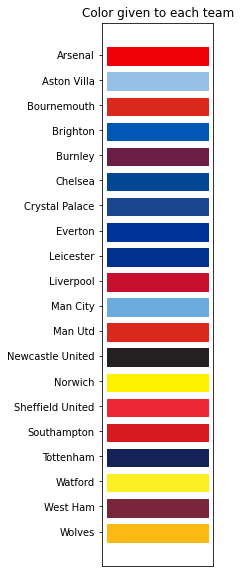

In [8]:
#create a figure

fig = plt.figure(figsize=(2,10))
ax = fig.add_subplot(111, facecolor='white')


y_val= 0
for team in sorted(teams, reverse=True):
    ax.fill_between([0,1], y_val+0.1, y_val+0.8, color=t_color[team])
    y_val+=1
    
ax.set_xticks([])

ax.set_yticks(np.arange(0.5, 20, 1))
ax.set_yticklabels(sorted(teams, reverse=True))
ax.set_title('Color given to each team')

plt.show()


## Getting the expected points

In [9]:
real_pts = {}
expect_pts = {}

for team in teams:
    real_pts[team] = df[df['teamId'] == team].pts.sum()
    expect_pts[team] = df[df['teamId'] == team].xpts.sum()
    
    
# Sort by points difference

pts_diff = {team:real_pts[team] - expect_pts[team] for team in teams}
sort_teams = sorted(pts_diff.keys(), key=pts_diff.get)


## Plotting difference in points

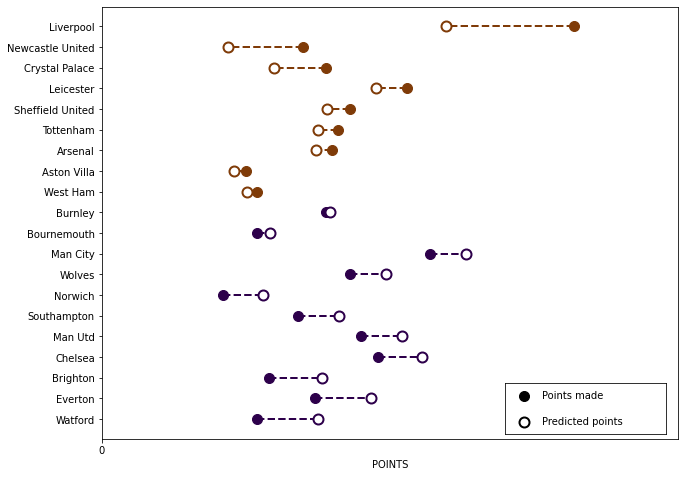

In [10]:
#figure

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])

#colors

colors= plt.get_cmap('PuOr', 2)

#data points to connect with a line

yval = 0
for team in sort_teams:
    if real_pts[team] > expect_pts[team]:
        fill_color=colors(0)
    else:
        fill_color=colors(1)
    ax.plot([real_pts[team], expect_pts[team]],[yval, yval], linestyle='--', linewidth=2, color=fill_color)
    ax.plot(real_pts[team], yval, 'o', color=fill_color, markersize=10)
    ax.plot(expect_pts[team], yval, 'o', color='white', markeredgecolor=fill_color, markeredgewidth=2, markersize=10)
    yval +=1
    
ax.grid(color='white', linewidth=2)


#labels for points

ax.set_xticks(np.arange(0,10,10))

#team label

ax.set_yticks(np.arange(0, len(sort_teams), 1))
ax.set_yticklabels(sort_teams)

#limits


ax.set_xlim(0, 100)


#labels


ax.set_xlabel('POINTS')

leg=fig.add_axes([0.7, 0.01, 0.28, 0.12])
leg.plot([0], [1], 'o', color='black', markersize=10)
leg.text(0.3, 1, 'Points made', ha='left', va='center')
leg.plot([0],[0], 'o', color='white', markeredgecolor='black', markeredgewidth=2, markersize=10)
leg.text(0.3, 0, 'Predicted points', ha='left', va='center')
leg.set_xticks([])
leg.set_yticks([])
leg.set_xlim(-0.3, 2.3)
leg.set_ylim(-0.5, 1.5)

plt.show()

# Player analysis

In [11]:
data = pd.read_csv('./data/players.csv')
data.head()

,Unnamed: 0,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team
0,1,0,0,1,0,0.1,534,37,1,0,...,0,1,0,0,0,45,False,0,Aaron Connolly,Brighton
1,2,0,0,1,0,0.3,534,43,1,0,...,21,1,10589,13500,2911,45,True,0,Aaron Connolly,Brighton
2,3,0,0,1,0,4.8,534,58,0,0,...,18,1,8090,11749,3659,45,False,0,Aaron Connolly,Brighton
3,4,0,0,2,0,0.6,534,63,1,0,...,0,1,8437,13439,5002,45,False,0,Aaron Connolly,Brighton
4,5,0,3,53,1,23.8,534,72,0,2,...,107,13,2156,5952,3796,45,True,0,Aaron Connolly,Brighton


In [13]:
players = pd.unique(data['full'])


#here we have  alist of all players in our dataframe

In [14]:
## Assists and goals

assists = {}
goals = {}

for baller in players:
    mins= data[data['full'] == baller].minutes.sum()/90.
    if mins >= 10:
        assists[baller] = data[data['full'] == baller].assists.sum()/mins
        goals[baller] = data[data['full'] == baller].goals_scored.sum()/mins

In [15]:
goaler = sorted(goals.keys(), key=goals.get, reverse=True)[:20]

passer = sorted(assists.keys(), key=assists.get, reverse=True)[:20]

In [47]:
goals

{'Aaron Cresswell': 0.13346515076618884,
 'Aaron Mooy': 0.10902483343428225,
 'Aaron Ramsdale': 0.0,
 'Aaron Wan-Bissaka': 0.0,
 'Abdoulaye Doucour?': 0.14735980352026196,
 'Adam Masina': 0.07371007371007371,
 'Adam Smith': 0.0,
 'Adam Webster': 0.13399503722084366,
 'Adama Traor?': 0.17408123791102514,
 'Adrian Mariappa': 0.0,
 'Ainsley Maitland-Niles': 0.0,
 'Alex Iwobi': 0.0774526678141136,
 'Alex McCarthy': 0.0,
 'Alex Oxlade-Chamberlain': 0.24635036496350365,
 'Alexander Tettey': 0.050505050505050504,
 'Alexandre Lacazette': 0.4805491990846682,
 'Alisson Ramses Becker': 0.0,
 'Allan Saint-Maximin': 0.1422924901185771,
 'Andreas Christensen': 0.0,
 'Andreas Pereira': 0.06241331484049931,
 'Andrew Robertson': 0.03683995088006549,
 'Angelo Ogbonna': 0.08333333333333333,
 'Angus Gunn': 0.0,
 'Anthony Martial': 0.528,
 'Antonio R?diger': 0.16,
 'Anwar El Ghazi': 0.21518230723251644,
 'Arthur Masuaku': 0.0,
 'Ashley Barnes': 0.4,
 'Ashley Westwood': 0.07692307692307693,
 'Ashley Young':

In [48]:
goaler

['Sergio Ag?ero',
 'Jamie Vardy',
 'Danny Ings',
 'Gabriel Fernando de Jesus',
 'Marcus Rashford',
 'Pierre-Emerick Aubameyang',
 'Mohamed Salah',
 'Dominic Calvert-Lewin',
 'Sadio Man?',
 'Tammy Abraham',
 'Harry Kane',
 'Anthony Martial',
 'Raheem Sterling',
 'Alexandre Lacazette',
 'Chris Wood',
 'Ra?l Jim?nez',
 'Heung-Min Son',
 'Riyad Mahrez',
 'Lys Mousset',
 'Harry Wilson']

In [17]:
#its not taking the names like that Im gonna change them

name = {}

for player in players:
    split_name = player.split(' ')
    name[player] = split_name[0][0] + '. ' + split_name[-1]

# Update certain player names
name['Sergio Ag?ero'] = 'S. Agüero'
name['Sadio Man?'] = 'S. Mané'
name['Ra?l Jim?nez'] = 'R. Jiménez'
name['Nicolas P?p?'] = 'N. Pépé'
name['Emiliano Buend?a'] = 'E. Buendía'
name['Adama Traor?'] = 'A. Traoré'
name['Pascal Gro?'] = 'P. Groß'
name['Rui Pedro dos Santos Patr?cio'] = 'R. Patrício'

## Best scorers

In [ ]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

#player

for player in goaler:
    team = data[data['full'] == player].team.iloc[0]
    ax.plot(assists[player], goaler[player], 'o', color=t_color[team],zorder=3)
    text = ax.text(assists[player] + 0.01, goaler[player],size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    
#grid

ax.grid(color='white', linewidth=2)

#labels
ax.set_xlabel('Assists per game', labelpad=14)
ax.set_ylabel('Goals per game', labelpad=14)


ax.set_xlim(0, 0.8)
ax.set_ylim(0.4, 1)

plt.show()

Developing ... 

## Assists

In [ ]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

for player in assists:
    team = data[data['full'] == player].team.iloc[0]
    ax.plot(passer[player], goaler[player], 'o', color=t_color[team], zorder=3)
    text = ax.text(assists[player] +0.01, goaler[player], player[player], size=14, va='center', ha='left',zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    
#grid

ax.grid(color='white', linewidth=2)

#labels

ax.set_xlabel('Assists per game', labelpad=10)
ax.set_ylabel('Goals per game', labelpad=10)

#limit
ax.set_xlim(0.2, 1)
ax.set_ylim(-0.1, 0.8)

plt.show()

Developing too ..

## Yellow teams per team

In [26]:
yellow = {}
red = {}

for team in teams:
    yellow[team] = data[data['team'] == team].yellow_cards.sum()
    red[team] = data[data['team'] == team].red_cards.sum()

In [27]:
most_yellow = sorted(yellow.keys(), key=yellow.get)

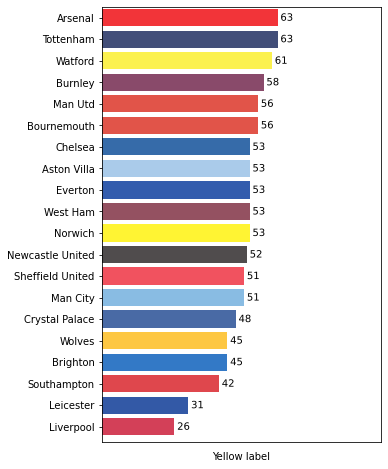

<Figure size 432x288 with 0 Axes>

In [28]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(111)

y_val = 0

for team in most_yellow:
    ax.barh(y_val, yellow[team], color=t_color[team], alpha=0.8)
    text = ax.text(yellow[team]+1, y_val, yellow[team], ha='left', va='center')
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    y_val+=1
    
#erase ticks  
ax.set_xticks([])
#y-ticks to team names
ax.set_yticks(np.arange(0, 21, 1))
ax.set_yticklabels(most_yellow)

#labels

ax.set_xlabel('Yellow label', labelpad=10)

#limits
ax.set_xlim(0,100)
ax.set_ylim(-0.7,19.5)

plt.show()
plt.savefig('./Figures/yelowcards.pdf')

Agressiveness is not related to how well a team plays 
being the clubs with the best playing hability the ones with 
less yellow cards being Liverpool the champions they are the ones with the 
lowest yellow cards.

# Measuring creativity

In [29]:
creativity = {}

for team in teams:
    creativity[team] = data[data['team'] == team].creativity.sum()

In [30]:
most_creative = sorted(creativity.keys(), key=creativity.get)

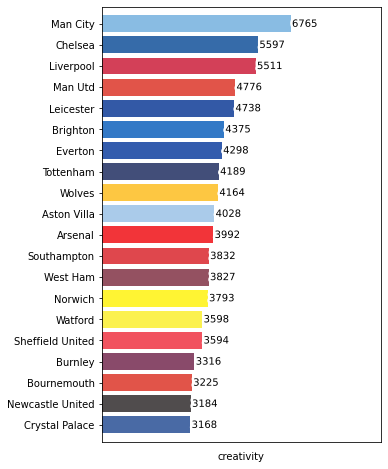

<Figure size 432x288 with 0 Axes>

In [31]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)

#making horizontal bar
y_val = 0

for team in most_creative:
    ax.barh(y_val, creativity[team], color=t_color[team], alpha=0.8)
    text = ax.text(creativity[team]+50, y_val, '%i'%creativity[team], ha='left', va='center')
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    y_val+=1
    
ax.set_xticks([])#ticks out

#y-ticks to team names
ax.set_yticks(np.arange(0,21,1))
ax.set_yticklabels(most_creative)

ax.set_xlabel('creativity', labelpad=10)


ax.set_xlim(0, 10000)
ax.set_ylim(-0.8, 19.8)
plt.show()
#plt.savefig('./Figures/creativity.png')

Here we can see how creativity has a big relation with money
being the richest clubs with the bigger creativity ranking, 
still newly promoted teams are not the ones with the lowest
creativity ranking.

## Best saves

In [33]:
gk_saves = {}
gk_clean_sheet = {}

for player in players:
    mins=data[data['full'] == player].minutes.sum()/90
    if mins >=10:
        gk_saves[player] = data[data['full'] == player].saves.sum()/mins
        gk_clean_sheet[player] = data[data['full'] == player].clean_sheets.sum()

In [34]:
gk_clean_sheet

{'Aaron Cresswell': 4,
 'Aaron Mooy': 4,
 'Aaron Ramsdale': 4,
 'Aaron Wan-Bissaka': 7,
 'Abdoulaye Doucour?': 9,
 'Adam Masina': 5,
 'Adam Smith': 3,
 'Adam Webster': 3,
 'Adama Traor?': 4,
 'Adrian Mariappa': 3,
 'Ainsley Maitland-Niles': 3,
 'Alex Iwobi': 1,
 'Alex McCarthy': 4,
 'Alex Oxlade-Chamberlain': 7,
 'Alexander Tettey': 5,
 'Alexandre Lacazette': 3,
 'Alisson Ramses Becker': 10,
 'Allan Saint-Maximin': 5,
 'Andreas Christensen': 2,
 'Andreas Pereira': 6,
 'Andrew Robertson': 11,
 'Angelo Ogbonna': 6,
 'Angus Gunn': 2,
 'Anthony Martial': 9,
 'Antonio R?diger': 3,
 'Anwar El Ghazi': 4,
 'Arthur Masuaku': 2,
 'Ashley Barnes': 8,
 'Ashley Westwood': 11,
 'Ashley Young': 2,
 'Ayoze P?rez': 7,
 'Bamidele Alli': 4,
 'Ben Foster': 9,
 'Ben Godfrey': 3,
 'Ben Mee': 11,
 'Benjamin Chilwell': 8,
 'Benjamin Mendy': 5,
 'Bernard An?cio Caldeira Duarte': 7,
 'Bernardo Mota Veiga de Carvalho e Silva': 6,
 'Bernd Leno': 7,
 'Bjorn Engels': 3,
 'Bukayo Saka': 4,
 'Callum Wilson': 3,
 'Cal

In [35]:
top_goalie = sorted(gk_saves.keys(), key=gk_saves.get, reverse=True)[:22]

In [36]:
top_goalie

['Hugo Lloris',
 'Martin Dubravka',
 'Bernd Leno',
 'Aaron Ramsdale',
 'Tim Krul',
 'Tom Heaton',
 'Vicente Guaita',
 'Paulo Gazzaniga',
 'Mathew Ryan',
 'Lukasz Fabianski',
 'Ben Foster',
 'Nick Pope',
 'Alex McCarthy',
 'Angus Gunn',
 'Kasper Schmeichel',
 'Rui Pedro dos Santos Patr?cio',
 'Dean Henderson',
 'David de Gea',
 'Jordan Pickford',
 'Alisson Ramses Becker',
 'Ederson Santana de Moraes',
 'Kepa Arrizabalaga']

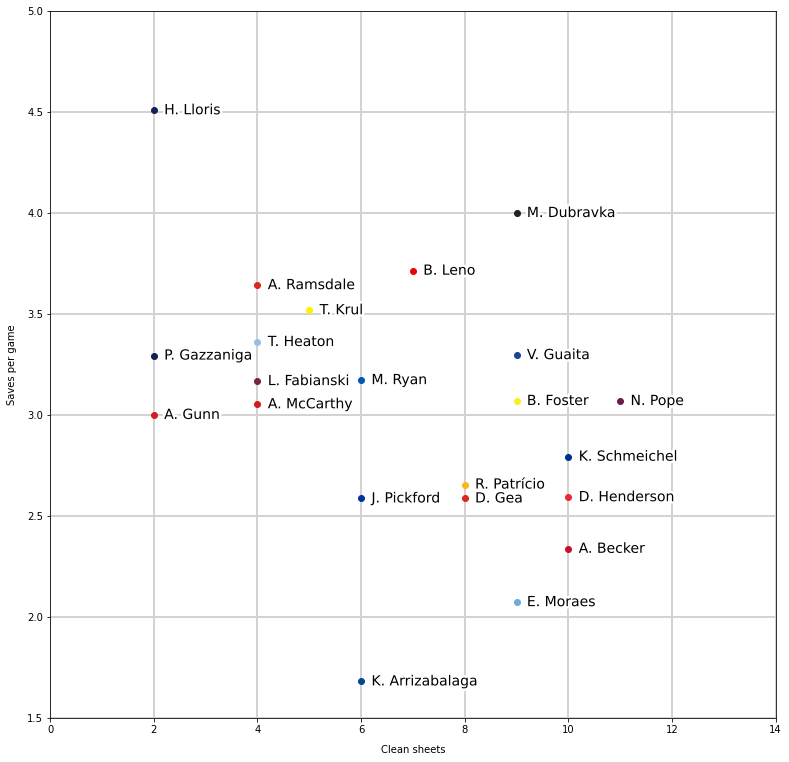

In [40]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)

for keeper in top_goalie:
    team = data[data['full'] == keeper].team.iloc[0]
    ax.plot(gk_clean_sheet[keeper], gk_saves[keeper], 'o', color=t_color[team], zorder=3)
    text = ax.text(gk_clean_sheet[keeper]+0.2, gk_saves[keeper],name[keeper], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    

ax.grid(color='lightgrey', linewidth=2)


ax.set_xlabel('Clean sheets', labelpad=10)
ax.set_ylabel('Saves per game', labelpad=10)

ax.set_xlim(0, 14)
ax.set_ylim(1.5, 5)

plt.show()

Here we can see a display of goalkeepers, on the xlabel we have cleansheets
and in ylabel how many times they are active we can see that the bigger 
the team the less saves they have, except for Hugo Lloris, who is 
the busiest gk on the league.